In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
def plot_series(time,series,format="-",start=0,end=None,label=None):
    plt.plot(time[start:end], series[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

    
def trend(time,slope=0):
    return slope*time
    
#seasonal Data
def seasonal_pattern(season_time):
    return np.where(season_time< 0.4,np.cos(season_time*2*np.pi),
                   1/np.exp(3*season_time))

def seasonality(time,period,amplitude=1,phase=0):
    season_time = ((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

# noise
def white_noise(time,noise_level=1,seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [3]:
time = np.arange(4*365+1)
slope = 0.05
baseline = 10
amplitude = 40

In [4]:
series = baseline+trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)
noise_level = 5
noise = white_noise(time,noise_level,seed=42)
series += noise

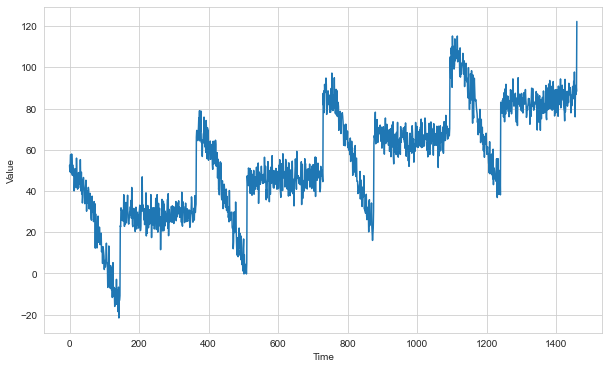

In [5]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [6]:
split_time = 1000
time_train = time[:split_time]
X_train = series[:split_time]
time_valid = time[split_time:]
X_valid = series[split_time:]

In [7]:
X_train.shape

(1000,)

In [8]:
X_valid.shape

(461,)

In [9]:
naive_forcast = series[split_time-1:-1]

In [10]:
naive_forcast

array([ 67.19673417,  71.34471371,  68.98551494,  64.67519969,
        61.15735421,  67.89843149,  66.39030291,  68.91468503,
        67.63070049,  69.7190049 ,  61.81174015,  71.0918342 ,
        65.51008011,  74.915873  ,  61.11138224,  73.25515699,
        65.58317034,  61.35506451,  62.211521  ,  63.04826468,
        66.79013535,  67.30303871,  61.8401661 ,  64.60694517,
        75.46036708,  73.40727142,  66.97195535,  65.00137499,
        65.43277204,  67.92169834,  59.76187207,  63.61091006,
        56.57705977,  66.9385108 ,  68.20101574,  62.57196852,
        72.88092156,  58.90546664,  57.73594625,  66.20382215,
        70.34101191,  73.54932937,  62.85965153,  70.57206865,
        65.01092175,  64.36533348,  69.67198015,  68.54070825,
        57.42274772,  72.71322451,  72.25699176,  62.25493006,
        67.38816456,  67.90589429,  66.76590023,  62.73798368,
        62.1585591 ,  65.41625898,  71.4352132 ,  68.3172915 ,
        63.77412404,  69.51377508,  51.44083364,  71.45

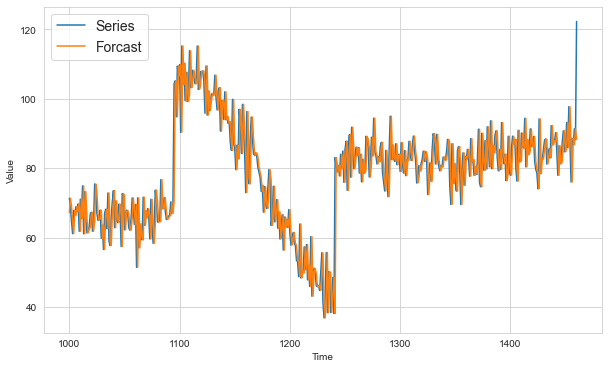

In [11]:
plt.figure(figsize=(10,6))
plot_series(time_valid,X_valid,label="Series")
plot_series(time_valid,naive_forcast,label="Forcast")
plt.show()

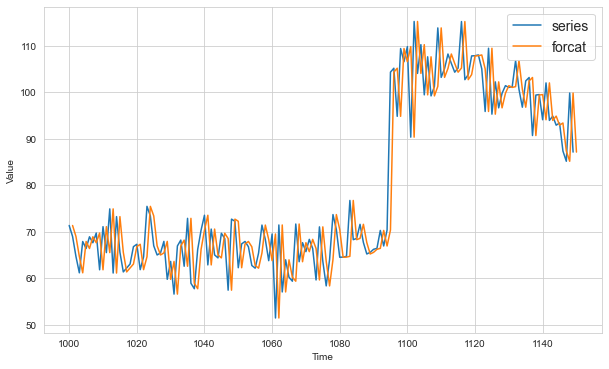

In [12]:
# zoom 0-150 days
plt.figure(figsize=(10,6))
plot_series(time_valid,X_valid,start=0,end=150,label="series")
plot_series(time_valid,naive_forcast,start=1,end=151,label="forcat")
            

In [13]:
errors = naive_forcast-X_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

5.9379085153216735